<a href="https://colab.research.google.com/github/imy0ung/AI_Basic_Study/blob/main/NLP/CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import torch
%matplotlib inline

In [2]:
!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

/bin/bash: line 1: conda: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.7 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-y1yu8tby
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-y1yu8tby
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=1711dba2dc8e03ca7d20aaee59a60b226ae55a1a366ef98fb8315384c0da78c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-5irkxcpl/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [3]:
import clip

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device = device) # model : clip, preprocess : compose

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 126MiB/s]


In [8]:
# 커비
!wget https://www.nintendo.co.kr/character/kirby/assets/img/home/kirby-powerful.png

--2024-11-04 05:47:05--  https://www.nintendo.co.kr/character/kirby/assets/img/home/kirby-powerful.png
Resolving www.nintendo.co.kr (www.nintendo.co.kr)... 151.101.1.55, 151.101.65.55, 151.101.129.55, ...
Connecting to www.nintendo.co.kr (www.nintendo.co.kr)|151.101.1.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250189 (244K) [image/png]
Saving to: ‘kirby-powerful.png.1’

kirby-powerful.png. 100%[===================>] 244.33K  --.-KB/s    in 0.02s   

2024-11-04 05:47:06 (9.62 MB/s) - ‘kirby-powerful.png.1’ saved [250189/250189]



In [9]:
# 자크
!wget https://ddragon.leagueoflegends.com/cdn/img/champion/splash/Zac_0.jpg

--2024-11-04 05:47:06--  https://ddragon.leagueoflegends.com/cdn/img/champion/splash/Zac_0.jpg
Resolving ddragon.leagueoflegends.com (ddragon.leagueoflegends.com)... 3.163.170.49
Connecting to ddragon.leagueoflegends.com (ddragon.leagueoflegends.com)|3.163.170.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146867 (143K) [image/jpeg]
Saving to: ‘Zac_0.jpg.1’

Zac_0.jpg.1         100%[===================>] 143.42K  --.-KB/s    in 0.02s   

2024-11-04 05:47:06 (8.66 MB/s) - ‘Zac_0.jpg.1’ saved [146867/146867]



In [34]:
# 호날두
!wget https://spnimage.edaily.co.kr/images/Photo/files/NP/S/2021/09/PS21091200363.jpg

--2024-11-04 05:55:42--  https://spnimage.edaily.co.kr/images/Photo/files/NP/S/2021/09/PS21091200363.jpg
Resolving spnimage.edaily.co.kr (spnimage.edaily.co.kr)... 1.248.254.68, 1.248.254.70, 1.248.254.84
Connecting to spnimage.edaily.co.kr (spnimage.edaily.co.kr)|1.248.254.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121456 (119K) [image/jpeg]
Saving to: ‘PS21091200363.jpg.1’

PS21091200363.jpg.1 100%[===================>] 118.61K   323KB/s    in 0.4s    

2024-11-04 05:55:43 (323 KB/s) - ‘PS21091200363.jpg.1’ saved [121456/121456]



In [36]:
# 라프라스
!wget https://local.pokemon.jp/img/p/pokemon/3ce00f99ca86a599eb3011747fcfeb1d.png

--2024-11-04 05:56:36--  https://local.pokemon.jp/img/p/pokemon/3ce00f99ca86a599eb3011747fcfeb1d.png
Resolving local.pokemon.jp (local.pokemon.jp)... 108.138.94.81, 108.138.94.97, 108.138.94.113, ...
Connecting to local.pokemon.jp (local.pokemon.jp)|108.138.94.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12150 (12K) [image/png]
Saving to: ‘3ce00f99ca86a599eb3011747fcfeb1d.png’

3ce00f99ca86a599eb3 100%[===================>]  11.87K  --.-KB/s    in 0s      

2024-11-04 05:56:37 (171 MB/s) - ‘3ce00f99ca86a599eb3011747fcfeb1d.png’ saved [12150/12150]



In [42]:
#  짱구
!wget https://upload.wikimedia.org/wikipedia/ko/thumb/4/4a/%EC%8B%A0%EC%A7%B1%EA%B5%AC.png/230px-%EC%8B%A0%EC%A7%B1%EA%B5%AC.png

--2024-11-04 06:02:06--  https://upload.wikimedia.org/wikipedia/ko/thumb/4/4a/%EC%8B%A0%EC%A7%B1%EA%B5%AC.png/230px-%EC%8B%A0%EC%A7%B1%EA%B5%AC.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35405 (35K) [image/png]
Saving to: ‘230px-신짱구.png’

230px-신짱구.png    100%[===================>]  34.58K  --.-KB/s    in 0.04s   

2024-11-04 06:02:06 (802 KB/s) - ‘230px-신짱구.png’ saved [35405/35405]



In [43]:
from glob import glob
files = glob("*.jpg") + glob("*.png")

In [44]:
QURIES = [
    'a photo of dog',
    'a photo of cat',
    'a photo of airplane',
    'a photo of zac',
    'a photo of jelly',
    'a photo of kirby',
    'a photo of GOAT',
    'a photo of Lapras',
    'a photo of fish',
    'a photo of Crayon Shin-chan'
]

In [45]:
QURIES_TOKEN = clip.tokenize(QURIES).to(device)

PS21091200363.jpg


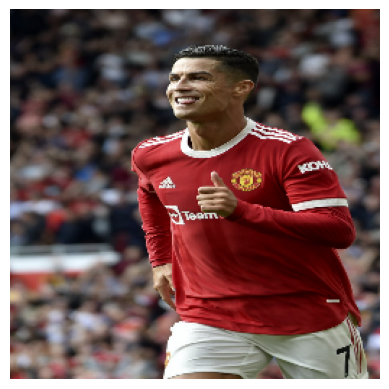

<ipython-input-46-611d9af221c0>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sc = float((torch.matmul(image_embeddings, text_embeddings.T).cpu().numpy()))


                         query     score      prob
6              a photo of GOAT  0.272217  0.994141
3               a photo of zac  0.209106  0.001802
5             a photo of kirby  0.206787  0.001449
8              a photo of fish  0.205444  0.001239
2          a photo of airplane  0.200562  0.000775
0               a photo of dog  0.191040  0.000299
4             a photo of jelly  0.187500  0.000209
1               a photo of cat  0.179688  0.000094
9  a photo of Crayon Shin-chan  0.167603  0.000028
7            a photo of Lapras  0.136108  0.000001

---------------------------------

Zac_0.jpg


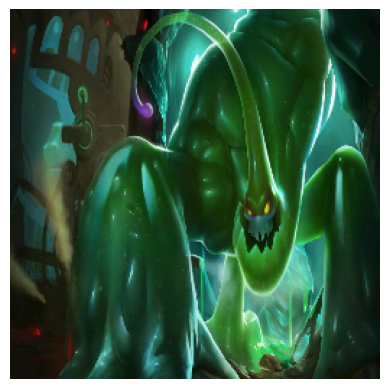

                         query     score      prob
3               a photo of zac  0.226440  0.639160
4             a photo of jelly  0.212036  0.151855
6              a photo of GOAT  0.208862  0.109375
5             a photo of kirby  0.199707  0.044189
7            a photo of Lapras  0.197632  0.036072
0               a photo of dog  0.185425  0.010658
8              a photo of fish  0.179443  0.005707
1               a photo of cat  0.170654  0.002378
2          a photo of airplane  0.155029  0.000510
9  a photo of Crayon Shin-chan  0.138916  0.000102

---------------------------------

20200721105324664B.jpg


<ipython-input-46-611d9af221c0>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sc = float((torch.matmul(image_embeddings, text_embeddings.T).cpu().numpy()))


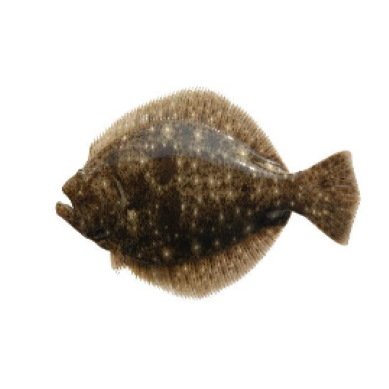

                         query     score          prob
8              a photo of fish  0.310059  9.936523e-01
4             a photo of jelly  0.253174  3.473282e-03
5             a photo of kirby  0.247559  2.010345e-03
1               a photo of cat  0.230957  3.719330e-04
0               a photo of dog  0.227417  2.636909e-04
3               a photo of zac  0.223755  1.840591e-04
7            a photo of Lapras  0.205566  3.004074e-05
6              a photo of GOAT  0.204956  2.777576e-05
2          a photo of airplane  0.192383  7.987022e-06
9  a photo of Crayon Shin-chan  0.152832  1.788139e-07

---------------------------------

3ce00f99ca86a599eb3011747fcfeb1d.png


<ipython-input-46-611d9af221c0>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sc = float((torch.matmul(image_embeddings, text_embeddings.T).cpu().numpy()))


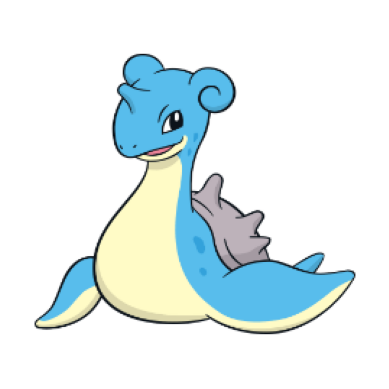

                         query     score          prob
7            a photo of Lapras  0.342285  1.000000e+00
4             a photo of jelly  0.248779  8.481741e-05
8              a photo of fish  0.233154  1.752377e-05
5             a photo of kirby  0.228271  1.096725e-05
3               a photo of zac  0.213501  2.443790e-06
0               a photo of dog  0.211060  1.907349e-06
6              a photo of GOAT  0.208740  1.549721e-06
2          a photo of airplane  0.204956  1.072884e-06
1               a photo of cat  0.184814  1.192093e-07
9  a photo of Crayon Shin-chan  0.164185  0.000000e+00

---------------------------------

230px-신짱구.png


<ipython-input-46-611d9af221c0>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sc = float((torch.matmul(image_embeddings, text_embeddings.T).cpu().numpy()))


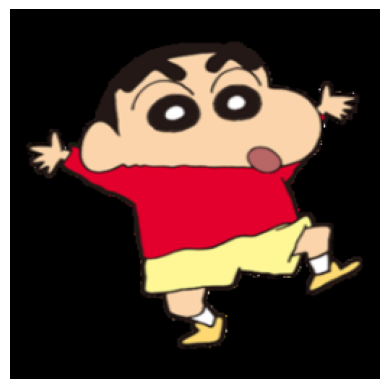

<ipython-input-46-611d9af221c0>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sc = float((torch.matmul(image_embeddings, text_embeddings.T).cpu().numpy()))


                         query     score          prob
9  a photo of Crayon Shin-chan  0.374023  1.000000e+00
5             a photo of kirby  0.254395  6.616116e-06
4             a photo of jelly  0.244873  2.503395e-06
0               a photo of dog  0.225586  3.576279e-07
3               a photo of zac  0.223633  2.980232e-07
6              a photo of GOAT  0.221191  2.384186e-07
8              a photo of fish  0.217285  1.788139e-07
1               a photo of cat  0.208374  5.960464e-08
2          a photo of airplane  0.201538  5.960464e-08
7            a photo of Lapras  0.171265  0.000000e+00

---------------------------------

kirby-powerful.png


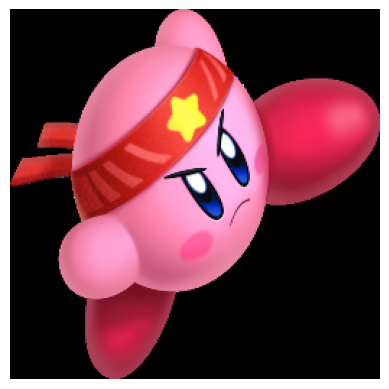

                         query     score      prob
5             a photo of kirby  0.316895  0.998047
4             a photo of jelly  0.252930  0.001622
6              a photo of GOAT  0.229126  0.000151
2          a photo of airplane  0.223267  0.000085
3               a photo of zac  0.220215  0.000062
8              a photo of fish  0.213745  0.000033
0               a photo of dog  0.212524  0.000029
9  a photo of Crayon Shin-chan  0.209229  0.000021
1               a photo of cat  0.203369  0.000011
7            a photo of Lapras  0.201904  0.000010

---------------------------------



<ipython-input-46-611d9af221c0>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sc = float((torch.matmul(image_embeddings, text_embeddings.T).cpu().numpy()))


In [46]:
with torch.no_grad() :
  for file in files :
    print(file)
    img = Image.open(file).convert("RGB")

    plt.imshow(cv2.resize(np.array(img),(256,256)))
    plt.axis('off')
    plt.show()

    img = preprocess(img).unsqueeze(0).to(device)

    image_embeddings = model.encode_image(img)
    image_embeddings /= image_embeddings.norm(dim=-1, keepdim=True)


    score = [] # 유사도

    for query in QURIES :
      texts = clip.tokenize(query).to(device)
      text_embeddings = model.encode_text(texts)
      text_embeddings /= text_embeddings.norm(dim=-1, keepdim=True)

      sc = float((torch.matmul(image_embeddings, text_embeddings.T).cpu().numpy()))
      score.append(sc)

    logits_per_image, logits_per_text = model(img,QURIES_TOKEN)
    prob = logits_per_image.softmax(dim=-1).cpu().numpy()

    print(pd.DataFrame({'query' : QURIES, 'score' : score, 'prob' : prob[0]}).sort_values('score', ascending = False))
    print('')
    print('---------------------------------')
    print('')